In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as datasets  # Standard datasets
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.
import torchvision.transforms as transforms

In [81]:
m = torch.nn.MaxPool2d(3, stride=2)

In [82]:
from PIL import Image
import torchvision.transforms.functional as TF

image = Image.open('cosmos_original.png')
noisy_img = TF.to_tensor(image)
# noisy_img = torch.unsqueeze(noisy_img, 0)

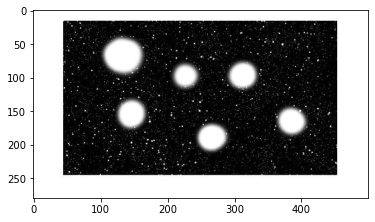

In [96]:
plt.imshow(noisy_img[0], cmap='gray')

In [84]:
maxpooled = m(noisy_img)

r1 = noisy_img.shape[1] / maxpooled.shape[1]
r2 = noisy_img.shape[2] / maxpooled.shape[2]
sf = (r1, r2)
print(maxpooled.shape)
upsampler = torch.nn.Upsample(scale_factor=sf, mode='bicubic')
upmaxpooled = upsampler(torch.unsqueeze(maxpooled, 0))

torch.Size([1, 139, 249])


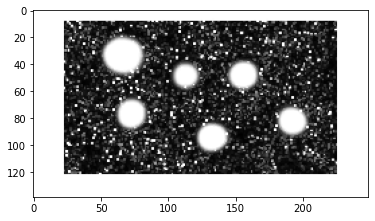

In [97]:
plt.imshow(maxpooled[0], cmap='gray')

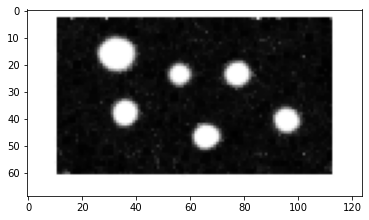

In [98]:
inverted = transforms.functional.invert(maxpooled)
inverted_maxpool = m(inverted)
minpooled = transforms.functional.invert(inverted_maxpool)
plt.imshow(minpooled[0], cmap='gray')

In [87]:
minpooled.shape

torch.Size([1, 69, 124])

In [88]:
r1 = noisy_img.shape[1] / minpooled.shape[1]
r2 = noisy_img.shape[2] / minpooled.shape[2]
sf = (r1, r2)
upsampler = torch.nn.Upsample(scale_factor=sf, mode='bicubic')
upminpooled = upsampler(torch.unsqueeze(minpooled, 0))

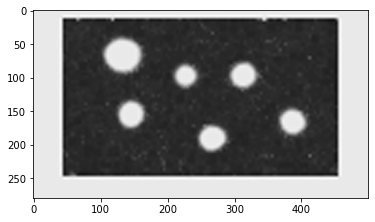

In [99]:
plt.imshow(upminpooled[0][0], cmap='gray')

In [90]:
noise_isolated = noisy_img - upminpooled[0]

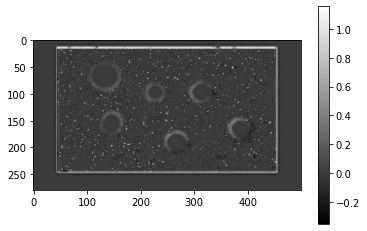

In [100]:
plt.imshow(noise_isolated[0], cmap='gray')
plt.colorbar()

In [ ]:
def remove_big_blobs():
    m = torch.nn.MaxPool2d(3, stride=2)
    maxpooled = m(noisy_img)

    r1 = noisy_img.shape[1] / maxpooled.shape[1]
    r2 = noisy_img.shape[2] / maxpooled.shape[2]
    sf = (r1, r2)
#     print(maxpooled.shape)
    upsampler = torch.nn.Upsample(scale_factor=sf, mode='bicubic')
    upmaxpooled = upsampler(torch.unsqueeze(maxpooled, 0))
    